<a href="https://colab.research.google.com/github/iairborgo/AA1-TUIA-Borgo-Nardi-Nardi/blob/main/interbank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import itertools

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_pf.csv')

In [ ]:
df['short_date'] = pd.to_datetime(df['short_date'])

In [ ]:
df.columns

Index(['Unnamed: 0', 'codmes', 'short_date', 'key_value', 'target', 'dia',
       'prox_15', 'day_week', 'flag_bonificacion', 'saldo_prom_parcial',
       'saldo_prom_tot_millo_premia', 'saldo_fdp_tot_txs', 'productos',
       'edad_m', 'saldo_fdp_tot_alcancia', 'dia.1', 'ant_1_prodpas_month',
       'saldo_prom_tot_activo', 'rango_ingreso', 'ct_prodpas',
       'ratio_over_10000', 'saldo_prom_tot_tc', 'tenencia', 'day_week.1',
       'prox_15.1', 'rango_edad', 'flagcy_sex', 'flag_civil', 'gency_m',
       'flag_costa', 'saldo_prom_tot_extracash_tc', 'civ_s',
       'saldo_prom_tot_libre_dispon', 'flag_frontera', 'productos.1',
       'rango_edad.1', 'rango_ingreso.1', 'prm_sowe1ptcallsf06m',
       'prm_usoep1tcallsf06m_ingb', 'prm_sowe1ptcallsf06m_ingb',
       'prm_usotcrrstsf06m_ingb', 'prm_usotcribksf06m_ingb',
       'ant_1_prod_month', 'ant_1_prod_day', 'ant_1_prodact_month',
       'ant_1_prodact_day', 'ct_prodact', 'ant_1_prodpas_month.1',
       'ant_1_prodpas_day', 'ct_prodp

In [ ]:
variables_generales = [
    'codmes', 'short_date', 'target', 'dia', 'prox_15', 'day_week'
]

# Información Demográfica y de Segmentación
info_demografica_segmentacion = [
    'rango_edad', 'flagcy_sex', 'flag_civil', 'gency_m',
    'flag_costa', 'flag_frontera'
]

# Información de Productos Bancarios
info_productos_bancarios = [
    'productos', 'saldo_prom_parcial', 'saldo_prom_tot_millo_premia',
    'saldo_fdp_tot_txs', 'saldo_fdp_tot_alcancia', 'saldo_prom_tot_activo',
    'saldo_prom_tot_tc', 'saldo_prom_tot_extracash_tc', 'saldo_prom_tot_libre_dispon',
    'saldo_fdp_tot_activo', 'saldo_fdp_tot_adel_sueldo', 'saldo_fdp_tot_ahor_cred',
    'saldo_fdp_tot_alcancia', 'saldo_fdp_tot_convenio', 'saldo_fdp_tot_cts',
    'saldo_fdp_tot_extracash_tc', 'saldo_fdp_tot_hipotecario', 'saldo_fdp_tot_hipotecario_cov19',
    'saldo_fdp_tot_inversion', 'saldo_fdp_tot_libre_dispon', 'saldo_fdp_tot_millo_premia',
    'saldo_fdp_tot_millo_super_tasa', 'saldo_fdp_tot_millonaria', 'saldo_fdp_tot_pasivo',
    'saldo_fdp_tot_planilla', 'saldo_fdp_tot_plazo_fijo'
]

# Información de Antigüedad y Cantidad de Productos
info_antiguedad_cantidad_productos = [
    'ant_1_prod_month', 'ant_1_prod_day', 'ant_1_prodact_day', 'ct_prodact',
    'ant_1_prodpas_day', 'ct_prodpas', 'ant_1_prodpas_month', 'ant_1_prodact_month'
]

# Información Adicional
info_adicional = [
    'flag_bonificacion', 'tenencia'
]


In [ ]:
list(df.columns.difference(list(itertools.chain(variables_generales, info_demografica_segmentacion, info_productos_bancarios,info_antiguedad_cantidad_productos, info_adicional))))

# Se pueden ver muchas columnas con .1 al final que estan repetidas, y si inspeccionamos
# las que arrancan con prm_

['Unnamed: 0',
 'ant_1_prodpas_month.1',
 'civ_s',
 'ct_prodpas.1',
 'day_week.1',
 'dia.1',
 'edad_m',
 'key_value',
 'prm_sowe1ptcallsf06m',
 'prm_sowe1ptcallsf06m_ingb',
 'prm_usoep1tcallsf06m_ingb',
 'prm_usotcribksf06m_ingb',
 'prm_usotcrrstsf06m_ingb',
 'productos.1',
 'prox_15.1',
 'rango_edad.1',
 'rango_ingreso',
 'rango_ingreso.1',
 'ratio_over_10000',
 'saldo_fdp_tot_alcancia.1']

In [ ]:
#03A444 Verde

#0039A6 Azul

# Define custom colors
custom_palette = ["#03A444", "#0039A6"]

# Set the custom color palette
sns.set_palette(sns.color_palette(custom_palette, 2))

# Set the theme to 'ticks' with the custom color palette
sns.set_theme(style="ticks")

#Transformaciones


In [ ]:
df.drop_duplicates('key_value', keep='last', inplace=True)

In [ ]:
df.drop(columns=['Unnamed: 0', 'key_value', 'codmes'], inplace=True)

In [ ]:
drop = [] # Esta lista va a eliminar columnas que no son necesarias, como vimos anteriormente
for col in df.columns:
  if col.endswith('1'):
    drop.append(col)
  if col.startswith('prm_'):
    drop.append(col)

df.drop(columns=drop, inplace=True)
del drop

In [ ]:
for col in df.columns:
  if df[col].isnull().sum() > 0:
    print(f"La columna {col} tiene {df[col].isnull().sum()} valores nulos")

La columna edad_m tiene 3783 valores nulos
La columna ant_1_prodpas_month tiene 1013 valores nulos
La columna rango_ingreso tiene 3353 valores nulos
La columna ct_prodpas tiene 178 valores nulos
La columna rango_edad tiene 2 valores nulos
La columna ant_1_prod_month tiene 178 valores nulos
La columna ant_1_prod_day tiene 178 valores nulos
La columna ant_1_prodact_month tiene 60044 valores nulos
La columna ant_1_prodact_day tiene 60044 valores nulos
La columna ct_prodact tiene 178 valores nulos
La columna ant_1_prodpas_day tiene 1013 valores nulos


In [ ]:
df['rango_edad'].fillna(2, inplace=True)

In [ ]:
df.groupby("flag_civil")['civ_s'].describe()

,count,mean,std,min,25%,50%,75%,max
flag_civil,,,,,,,,
0,10334.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,83322.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,302.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,24977.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.groupby("civ_s")['target'].describe()

,count,mean,std,min,25%,50%,75%,max
civ_s,,,,,,,,
0,35613.0,0.031084,0.173548,0.0,0.0,0.0,0.0,1.0
1,83322.0,0.032848,0.178241,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.drop(columns = ['civ_s'], inplace = True)

In [ ]:
df.groupby("flag_civil")['edad_m'].describe()

,count,mean,std,min,25%,50%,75%,max
flag_civil,,,,,,,,
0,6551.0,341.536865,158.166594,226.0,259.0,272.0,292.00,1019.0
1,83322.0,413.245985,108.479824,229.0,334.0,391.0,470.00,1111.0
2,302.0,749.092715,138.051069,377.0,670.0,744.5,823.75,1143.0
3,24977.0,580.233495,130.886661,256.0,488.0,570.0,664.00,1196.0


In [ ]:
df["flag_civil"].replace(0, 3, inplace = True)
df['flag_civil'].replace({1: "Soltero", 2: "Viudo", 3: "Casado"}, inplace = True)

In [ ]:
df.groupby("flag_civil")['target'].describe()

,count,mean,std,min,25%,50%,75%,max
flag_civil,,,,,,,,
Casado,35311.0,0.031067,0.173501,0.0,0.0,0.0,0.0,1.0
Soltero,83322.0,0.032848,0.178241,0.0,0.0,0.0,0.0,1.0
Viudo,302.0,0.033113,0.179228,0.0,0.0,0.0,0.0,1.0


In [ ]:
df[df['flag_civil'] == "Soltero"].groupby('rango_edad')['edad_m'].describe()

,count,mean,std,min,25%,50%,75%,max
rango_edad,,,,,,,,
1.0,1.0,309.000000,NaN,309.0,309.0,309.0,309.0,309.0
2.0,21848.0,301.127380,25.819878,229.0,286.0,306.0,322.0,575.0
3.0,52119.0,420.536081,57.965527,242.0,372.0,412.0,463.0,781.0
4.0,8891.0,624.236081,60.756792,311.0,577.0,609.0,661.0,891.0
5.0,359.0,816.515320,60.236120,331.0,803.0,818.0,840.5,876.0
6.0,104.0,884.711538,139.083524,348.0,883.0,904.0,938.0,1111.0


In [ ]:
df.groupby('rango_edad')['edad_m'].describe()

,count,mean,std,min,25%,50%,75%,max
rango_edad,,,,,,,,
1.0,1.0,309.000000,NaN,309.0,309.00,309.0,309.0,309.0
2.0,27527.0,294.908127,28.300536,226.0,274.00,298.0,318.0,812.0
3.0,63148.0,429.612355,60.728885,242.0,377.00,422.0,479.0,781.0
4.0,22109.0,638.966575,65.105853,282.0,585.00,626.0,685.0,891.0
5.0,1719.0,824.599767,36.006149,331.0,805.00,822.0,844.0,996.0
6.0,648.0,920.992284,83.818113,342.0,889.75,917.0,952.0,1196.0


In [ ]:
df['edad_m'].isna().groupby(df['flag_civil']).sum()

flag_civil
Casado     3783
Soltero       0
Viudo         0
Name: edad_m, dtype: int64

In [ ]:
df['edad_m'] = df['edad_m'].fillna(df.groupby('rango_edad')["edad_m"].transform('mean'))

In [ ]:
df["rango_etario"] = pd.cut(df["edad_m"], bins=[0, 288, 408, 528, 648, 9999], labels = ['0-24', '25-34', "35-44", "45-54", "55+"])

In [ ]:
df.groupby("rango_etario")['target'].describe()

<ipython-input-17-8a531260e69c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("rango_etario")['target'].describe()


,count,mean,std,min,25%,50%,75%,max
rango_etario,,,,,,,,
0-24,10895.0,0.014227,0.118430,0.0,0.0,0.0,0.0,1.0
25-34,45141.0,0.030704,0.172516,0.0,0.0,0.0,0.0,1.0
35-44,33536.0,0.036200,0.186790,0.0,0.0,0.0,0.0,1.0
45-54,18300.0,0.035738,0.185641,0.0,0.0,0.0,0.0,1.0
55+,11063.0,0.039320,0.194365,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.drop(columns = ["rango_edad"], inplace = True)
# df.dropna(subset = ["edad_m"], inplace = True)

In [ ]:
df.groupby('target')['edad_m'].mean()

target
0    443.720391
1    466.100056
Name: edad_m, dtype: float64

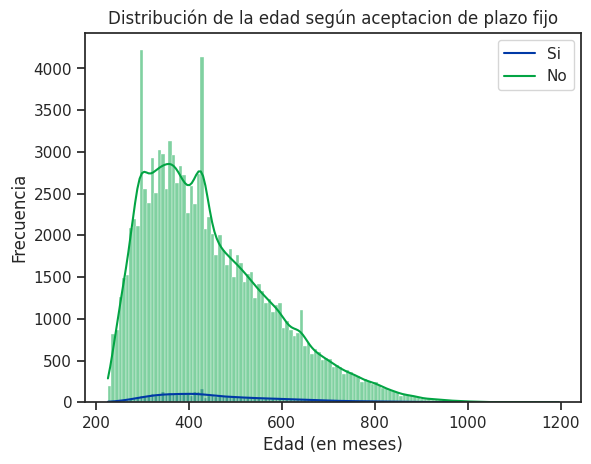

In [ ]:
sns.histplot(x = "edad_m", data = df, kde=True, hue = 'target', palette = sns.color_palette(custom_palette,2))
plt.xlabel('Edad (en meses)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la edad según aceptacion de plazo fijo')
plt.legend(labels = ['Si', 'No'])

In [ ]:
df['log_salario_prom_parcial'] = np.log10(1 + df['saldo_prom_parcial'])

([<matplotlib.axis.XTick at 0x7dfef9d5eaa0>,
 [Text(0, 0, '0'),
  Text(1, 0, '10'),
  Text(2, 0, '100'),
  Text(3, 0, '1000'),
  Text(4, 0, '10000'),
  Text(5, 0, '100000'),
  Text(6, 0, '1M'),
  Text(7, 0, '10M')])

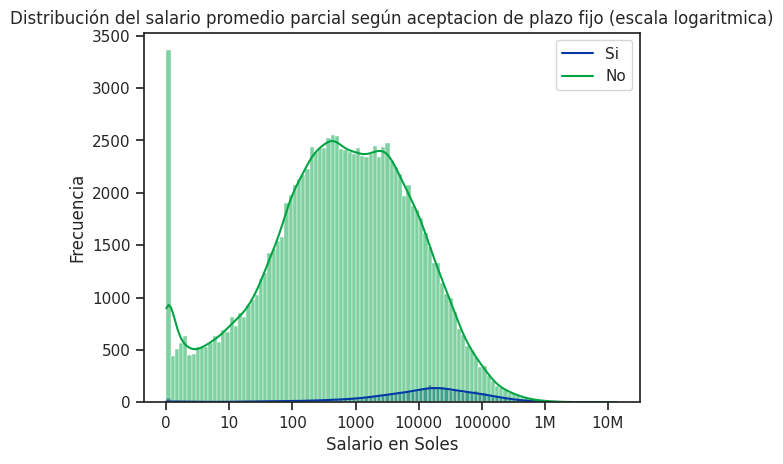

In [ ]:
sns.histplot(x = 'log_salario_prom_parcial', data = df, kde=True, hue = 'target', palette = sns.color_palette([custom_palette[0], custom_palette[1]],2))
plt.xlabel('Salario en Soles')
plt.ylabel('Frecuencia')
plt.title('Distribución del salario promedio parcial según aceptacion de plazo fijo (escala logaritmica)')
locs, labels = plt.xticks()
plt.legend(labels = ['Si', 'No'])
plt.xticks(np.arange(0,8), labels = ['0', '10', '100', '1000', '10000', '100000', '1M', '10M'])
#plt.xticks(labels = ['0', '10', '100', '1000', '10000', '100000', '1000000'])

In [ ]:
df['log_salario_fdp_tot_pasivo'] = np.log10(1 + df['saldo_fdp_tot_pasivo'])

([<matplotlib.axis.XTick at 0x7dfef9a1dcf0>,
 [Text(0, 0, '0'),
  Text(1, 0, '10'),
  Text(2, 0, '100'),
  Text(3, 0, '1000'),
  Text(4, 0, '10000'),
  Text(5, 0, '100000'),
  Text(6, 0, '1M'),
  Text(7, 0, '10M')])

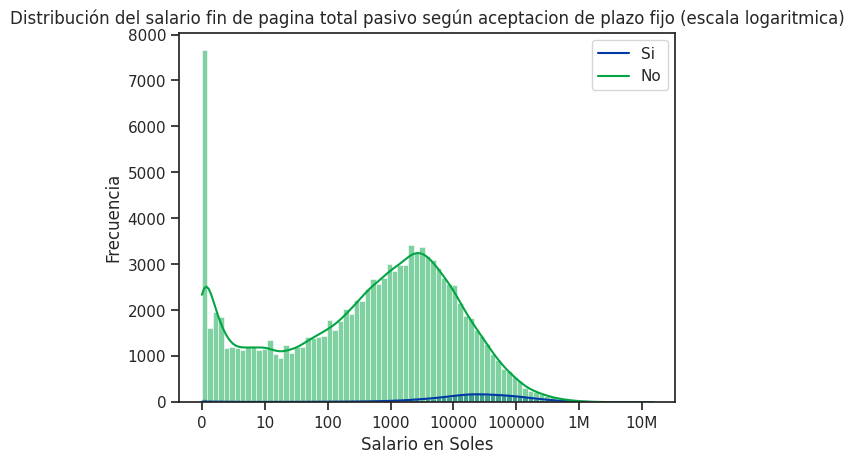

In [ ]:
sns.histplot(x = 'log_salario_fdp_tot_pasivo', data = df, kde=True, hue = 'target', palette = sns.color_palette(custom_palette,2))
plt.xlabel('Salario en Soles')
plt.ylabel('Frecuencia')
plt.title('Distribución del salario fin de pagina total pasivo según aceptacion de plazo fijo (escala logaritmica)')
plt.legend(labels = ['Si', 'No'])
locs, labels = plt.xticks()
plt.xticks(np.arange(0,8), labels = ['0', '10', '100', '1000', '10000', '100000', '1M', '10M'])

In [ ]:
df.drop(columns = ["log_salario_prom_parcial", 'log_salario_fdp_tot_pasivo'], inplace = True)

# Exploracion de datos


In [ ]:
len(df)

118935

In [ ]:
df['target'].mean()

0.03232017488544163

In [ ]:
df.groupby('day_week')['target'].mean() * 100

day_week
1    3.539479
2    3.447509
3    3.525148
4    3.225442
5    3.286517
6    3.140097
7    2.153823
Name: target, dtype: float64

In [ ]:
for rango in sorted(df["rango_ingreso"].unique()):
  if np.isnan(rango):
    continue
  var = df[df['rango_ingreso'] == rango]["saldo_prom_parcial"]
  print(f"El rango {rango} tiene valores entre {var.min()} y {var.max()}")

var = df[df['rango_ingreso'].isna()]["saldo_prom_parcial"]
print(f'El rango nan tiene valores entre {var.min()} y {var.max()}')

del var

El rango 1.0 tiene valores entre 0.0 y 65013.417
El rango 2.0 tiene valores entre 0.0 y 267263.545
El rango 3.0 tiene valores entre 0.0 y 3492599.768
El rango 4.0 tiene valores entre 0.0 y 2241987.879
El rango 5.0 tiene valores entre 0.0 y 3286059.68
El rango 6.0 tiene valores entre 0.0 y 14011436.757
El rango nan tiene valores entre 0.0 y 1513893.062


In [ ]:
(df[info_productos_bancarios] == 0).sum()

productos                              49
saldo_prom_parcial                   2803
saldo_prom_tot_millo_premia        104320
saldo_fdp_tot_txs                   41098
saldo_fdp_tot_alcancia              81610
saldo_prom_tot_activo               66420
saldo_prom_tot_tc                   71665
saldo_prom_tot_extracash_tc        114133
saldo_prom_tot_libre_dispon        115866
saldo_fdp_tot_activo                69411
saldo_fdp_tot_adel_sueldo          124584
saldo_fdp_tot_ahor_cred            126581
saldo_fdp_tot_alcancia              81610
saldo_fdp_tot_convenio             125077
saldo_fdp_tot_cts                  106515
saldo_fdp_tot_extracash_tc         114871
saldo_fdp_tot_hipotecario          124214
saldo_fdp_tot_hipotecario_cov19    126418
saldo_fdp_tot_inversion            124414
saldo_fdp_tot_libre_dispon         116389
saldo_fdp_tot_millo_premia         105739
saldo_fdp_tot_millo_super_tasa     123176
saldo_fdp_tot_millonaria           103786
saldo_fdp_tot_pasivo              

In [ ]:
df.groupby("target")['ratio_over_10000'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,122367.0,0.470649,1.746431,0.0,0.180100,0.290959,0.561260,315.431636
1,4311.0,0.879326,2.871210,0.0,0.287337,0.576600,0.910968,132.641889


In [ ]:
df.groupby("rango_etario")['target'].mean() * 100

rango_etario
0-24     1.422671
25-34    3.070379
35-44    3.619990
45-54    3.573770
55+      3.932026
Name: target, dtype: float64

solo 1 en rango_edad = 1. Ademas no parecen ser consistentes los limites de cada batch asi que voy a crear una nueva variable usando la edad en meses (aunque tenga mas nulos)


In [ ]:
df.groupby("rango_ingreso")['target'].mean() * 100

rango_ingreso
1.0     1.863354
2.0     1.292067
3.0     1.889181
4.0     4.048336
5.0     8.890203
6.0    14.006969
Name: target, dtype: float64

In [ ]:
df.pivot_table(index = 'flag_civil', columns = 'rango_etario', values = 'target', aggfunc = ['mean','count'])

mean                                         count         \
rango_etario      0-24     25-34     35-44     45-54       55+  0-24  25-34   
flag_civil                                                                    
Casado        0.015450  0.011633  0.036908  0.050292  0.042892  4725   2235   
Soltero       0.013212  0.032361  0.038572  0.033160  0.032227  6131  40852   
Viudo         0.025641  0.018500  0.027929  0.036951  0.041993    39   2054   

                                 
rango_etario  35-44 45-54   55+  
flag_civil                       
Casado         2005   855   816  
Soltero       24370  8866  3103  
Viudo          7161  8579  7144

In [ ]:
df.groupby("flag_costa")['target'].mean() * 100

flag_costa
0    1.950045
1    3.509759
Name: target, dtype: float64

In [ ]:
df.groupby("flag_frontera")['target'].mean() * 100

flag_frontera
0    3.522103
1    1.332656
Name: target, dtype: float64

# Experimentacion


In [ ]:
import xgboost as xgb
from numpy import array
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
df.columns
df_ft = df.drop(columns = ['short_date', 'flag_bonificacion', 'ratio_over_10000',
                            'prox_15', 'dia', 'gency_m', 'flagcy_sex',
                            'rango_ingreso', 'tenencia', 'productos', 'ant_1_prodact_month',
                           'ant_1_prodact_day', 'rango_etario', 'day_week', 'target',
                           'ant_1_prodpas_month', 'ant_1_prod_month', 'ct_prodpas',
                           'ct_prodact', 'ant_1_prodpas_day', 'ant_1_prod_day'])

df_ft['flag_civil'] = df_ft['flag_civil'].astype('category')
df_ft.info()

y = df['target']

<class 'pandas.core.frame.DataFrame'>
Index: 118935 entries, 0 to 127111
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   saldo_prom_parcial               118935 non-null  float64 
 1   saldo_prom_tot_millo_premia      118935 non-null  float64 
 2   saldo_fdp_tot_txs                118935 non-null  float64 
 3   edad_m                           118935 non-null  float64 
 4   saldo_fdp_tot_alcancia           118935 non-null  float64 
 5   saldo_prom_tot_activo            118935 non-null  float64 
 6   saldo_prom_tot_tc                118935 non-null  float64 
 7   flag_civil                       118935 non-null  category
 8   flag_costa                       118935 non-null  int64   
 9   saldo_prom_tot_extracash_tc      118935 non-null  float64 
 10  saldo_prom_tot_libre_dispon      118935 non-null  float64 
 11  flag_frontera                    118935 non-null  int64  

In [ ]:
cont = df_ft.select_dtypes(include='float')
cat = df_ft.select_dtypes(include=['category', 'int'])
cat.reset_index(inplace = True, drop = True)
cont.reset_index(inplace = True, drop = True)

In [ ]:
cat = pd.concat([cat, pd.get_dummies(cat['flag_civil'], drop_first = True)], axis = 1)
cat.drop(columns = ['flag_civil'], inplace = True)

In [ ]:
X = pd.concat([cont, cat], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
training = xgb.DMatrix(X_train, y_train)
test = xgb.DMatrix(X_test, y_test)

In [ ]:
parametros = {'objective': 'binary:logistic',
              "booster":"gbtree",
              "max_depth": 5,
              'lambda' : 1,
              "eta": 0.3,
              "objective": "binary:logistic"}
rondas = 200
evaluacion = [(test, "eval"), (training, "train")]

In [ ]:
modelo_xgb1 = xgb.train(parametros, training, rondas, evaluacion, early_stopping_rounds=10)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	eval-logloss:0.17357	train-logloss:0.17296
[1]	eval-logloss:0.15358	train-logloss:0.15268
[2]	eval-logloss:0.14004	train-logloss:0.13873
[3]	eval-logloss:0.13068	train-logloss:0.12895
[4]	eval-logloss:0.12426	train-logloss:0.12210
[5]	eval-logloss:0.12018	train-logloss:0.11738
[6]	eval-logloss:0.11722	train-logloss:0.11401
[7]	eval-logloss:0.11545	train-logloss:0.11170
[8]	eval-logloss:0.11424	train-logloss:0.11009
[9]	eval-logloss:0.11350	train-logloss:0.10886
[10]	eval-logloss:0.11286	train-logloss:0.10791
[11]	eval-logloss:0.11266	train-logloss:0.10717
[12]	eval-logloss:0.11228	train-logloss:0.10657
[13]	eval-logloss:0.11204	train-logloss:0.10601
[14]	eval-logloss:0.11204	train-logloss:0.10540
[15]	eval-logloss:0.11183	train-logloss:0.10495
[16]	eval-logloss:0.11184	train-logloss:0.10472
[17]	eval-logloss:0.11171	train-logloss:0.10449
[18]	eval-logloss:0.11169	train-logloss:0.10426
[19]	eval-logloss:0.11166	train-logloss:0.10397
[20]	eval-logloss:0.11161	train-logloss:0.10374
[2

In [ ]:
prediccion_1 = modelo_xgb1.predict(test)

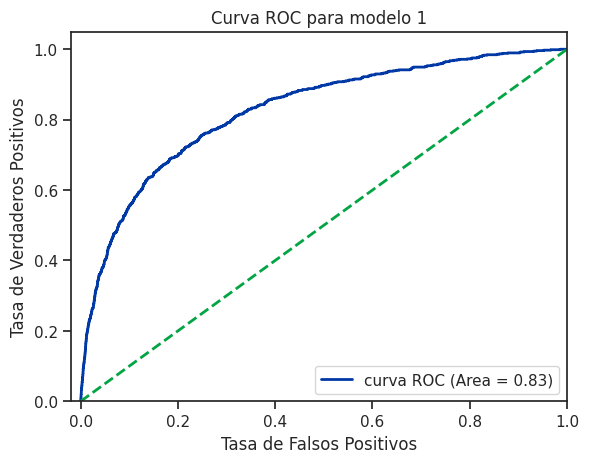

In [ ]:
fpr, tpr, _ = roc_curve(y_test, prediccion_1) # fpr = De todas las personas que no van a tener el plazo fijo, cuantas clasificamos bien
                                              # tpr = de todas las personas que van a tener el plazo fijo, cuantas clasficamos bien
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color=custom_palette[1],
         lw=lw, label='curva ROC (Area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color=custom_palette[0], lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para modelo 1')
plt.legend(loc="lower right")
plt.show()

In [ ]:
prediccion_1 = [1 if i > .025 else 0 for i in prediccion_1]

In [ ]:
(tn, fp, fn, tp)= confusion_matrix(y_test, prediccion_1).ravel() #.025
(tn, fp, fn, tp)

(17746, 5272, 205, 564)

In [ ]:
true_positive_rate = tp/(tp+fn)
true_positive_rate

0.7334200260078023

In [ ]:
false_positive_rate = fp/(fp+tn)
false_positive_rate

0.2290381440611695

In [ ]:
recall_1 = tp/(tp+fn)
recall_1

0.7334200260078023

In [ ]:
precision_1 = tp/(tp+fp)
precision_1

0.09664153529814942

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 26.4 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(modelo_xgb1)
shap_values = explainer(X_train)

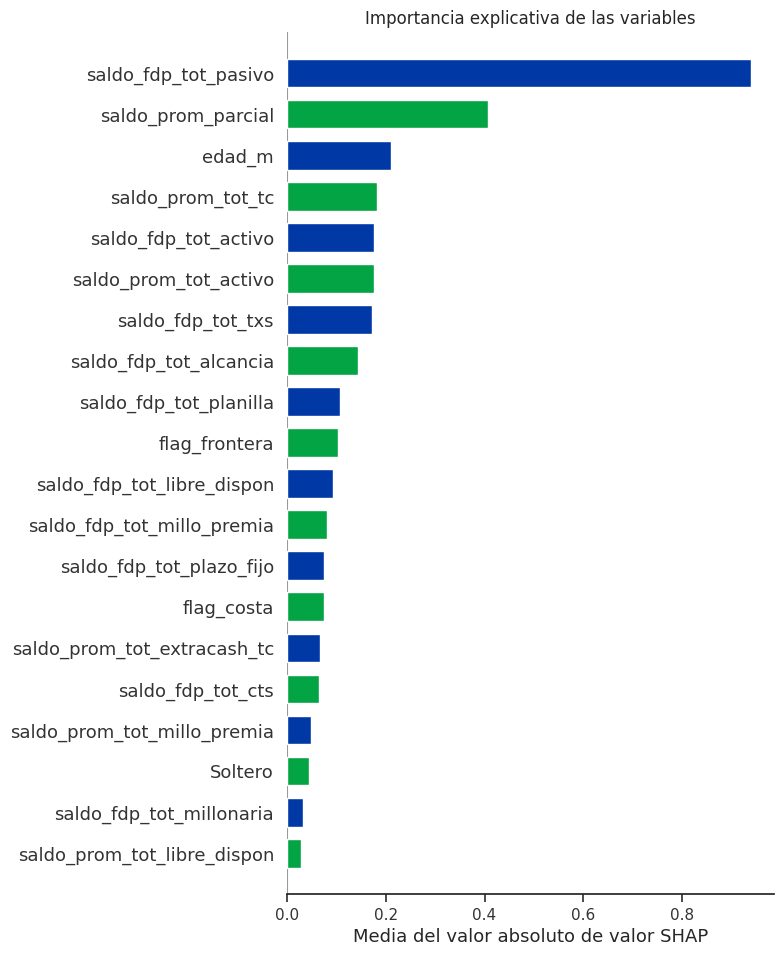

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar", color = custom_palette, show = False)
fig, ax = plt.gcf(), plt.gca()
ax.set_xlabel('Media del valor absoluto de valor SHAP')
ax.set_title('Importancia explicativa de las variables')
plt.show()

In [ ]:
cols = ['saldo_fdp_tot_pasivo', 'saldo_prom_parcial',
        'saldo_prom_tot_activo', 'edad_m', 'saldo_prom_tot_tc', 'saldo_fdp_tot_activo',
        'saldo_fdp_tot_txs', 'saldo_fdp_tot_alcancia', 'flag_costa',
        'flag_frontera', 'saldo_fdp_tot_planilla', 'saldo_fdp_tot_libre_dispon',
        'saldo_fdp_tot_plazo_fijo', 'saldo_fdp_tot_millo_premia']


In [ ]:
print(len(X_train.columns))
print(len(cols))

29
14


In [ ]:
X_train2 = X_train[cols]
X_test2 = X_test[cols]

In [ ]:
training2 = xgb.DMatrix(X_train2, y_train)
test2 = xgb.DMatrix(X_test2, y_test)

In [ ]:
evaluacion = [(test2, "eval"), (training2, "train")]
modelo_xgb2 = xgb.train(parametros, training2, rondas, evaluacion, early_stopping_rounds=10)

[0]	eval-logloss:0.17362	train-logloss:0.17301
[1]	eval-logloss:0.15349	train-logloss:0.15274
[2]	eval-logloss:0.13990	train-logloss:0.13883
[3]	eval-logloss:0.13060	train-logloss:0.12911


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[4]	eval-logloss:0.12441	train-logloss:0.12236
[5]	eval-logloss:0.12025	train-logloss:0.11769
[6]	eval-logloss:0.11732	train-logloss:0.11452
[7]	eval-logloss:0.11534	train-logloss:0.11218
[8]	eval-logloss:0.11420	train-logloss:0.11062
[9]	eval-logloss:0.11349	train-logloss:0.10929
[10]	eval-logloss:0.11303	train-logloss:0.10836
[11]	eval-logloss:0.11265	train-logloss:0.10773
[12]	eval-logloss:0.11255	train-logloss:0.10716
[13]	eval-logloss:0.11233	train-logloss:0.10662
[14]	eval-logloss:0.11219	train-logloss:0.10618
[15]	eval-logloss:0.11218	train-logloss:0.10585
[16]	eval-logloss:0.11212	train-logloss:0.10536
[17]	eval-logloss:0.11218	train-logloss:0.10494
[18]	eval-logloss:0.11216	train-logloss:0.10465
[19]	eval-logloss:0.11205	train-logloss:0.10411
[20]	eval-logloss:0.11215	train-logloss:0.10384
[21]	eval-logloss:0.11224	train-logloss:0.10352
[22]	eval-logloss:0.11229	train-logloss:0.10317
[23]	eval-logloss:0.11232	train-logloss:0.10293
[24]	eval-logloss:0.11234	train-logloss:0.1027

In [ ]:
prediccion_2 = modelo_xgb2.predict(test2)
prediccion_2 = [1 if i > .025 else 0 for i in prediccion_2]

In [ ]:
(tn, fp, fn, tp)= confusion_matrix(y_test, prediccion_2).ravel() #.025
(tn, fp, fn, tp)

recall_2 = tp/(tp+fn)
print(f'Recall:  {recall_2}')

precision_2 = tp/(tp+fp)
print(f'Precision:  {precision_2}')

Recall:  0.7230169050715215
Precision:  0.09528706083976007


In [ ]:
explainer2 = shap.TreeExplainer(modelo_xgb2)
shap_values2 = explainer2(X_train2)

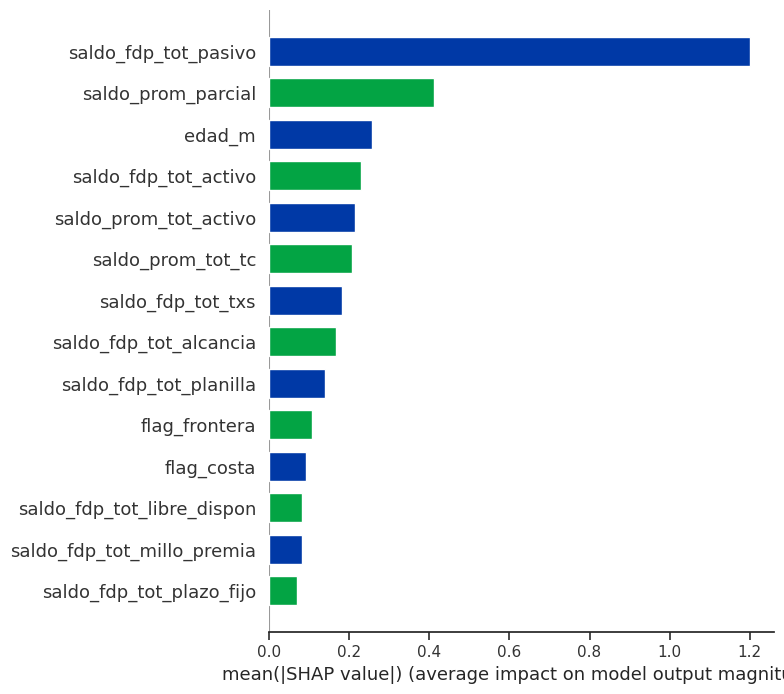

In [ ]:
shap.summary_plot(shap_values2, X_train2, plot_type="bar", color = custom_palette)

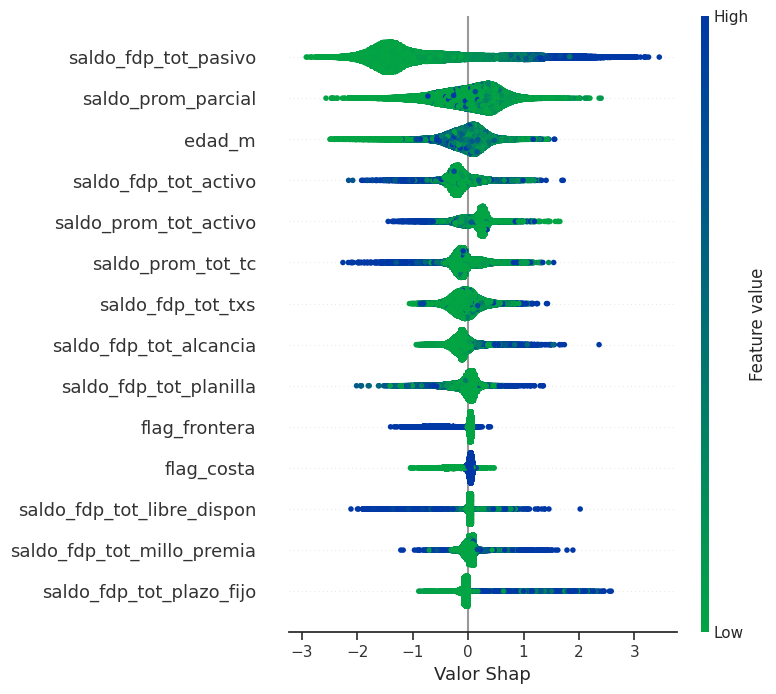

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Create a colormap object
cmap_name = 'custom_cmap'
cm = LinearSegmentedColormap.from_list(cmap_name, custom_palette)

# Example usage: plot color gradient
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


shap.summary_plot(shap_values2, X_train2, cmap = cm, show = False)
fig, ax = plt.gcf(), plt.gca()
ax.set_xlabel('Valor Shap')
plt.show()

In [ ]:
cols2 = cols.copy()
cols2.remove('saldo_prom_tot_activo')
cols2.remove('saldo_fdp_tot_txs')
cols2.remove('saldo_prom_tot_tc')

In [ ]:
cols2

['saldo_fdp_tot_pasivo',
 'saldo_prom_parcial',
 'edad_m',
 'saldo_fdp_tot_activo',
 'saldo_fdp_tot_alcancia',
 'flag_costa',
 'flag_frontera',
 'saldo_fdp_tot_planilla',
 'saldo_fdp_tot_libre_dispon',
 'saldo_fdp_tot_plazo_fijo',
 'saldo_fdp_tot_millo_premia']

In [ ]:
X_train3 = X_train[cols2]
X_test3 = X_test[cols2]
training3 = xgb.DMatrix(X_train3, y_train)
test3 = xgb.DMatrix(X_test3, y_test)

In [ ]:
evaluacion = [(test3, "eval"), (training3, "train")]
modelo_xgb3 = xgb.train(parametros, training3, rondas, evaluacion, early_stopping_rounds=10)

[0]	eval-logloss:0.17355	train-logloss:0.17308
[1]	eval-logloss:0.15366	train-logloss:0.15286
[2]	eval-logloss:0.14026	train-logloss:0.13898
[3]	eval-logloss:0.13101	train-logloss:0.12940
[4]	eval-logloss:0.12465	train-logloss:0.12274
[5]	eval-logloss:0.12044	train-logloss:0.11813


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[6]	eval-logloss:0.11757	train-logloss:0.11497
[7]	eval-logloss:0.11577	train-logloss:0.11271
[8]	eval-logloss:0.11457	train-logloss:0.11112
[9]	eval-logloss:0.11380	train-logloss:0.11005
[10]	eval-logloss:0.11339	train-logloss:0.10924
[11]	eval-logloss:0.11303	train-logloss:0.10858
[12]	eval-logloss:0.11274	train-logloss:0.10790
[13]	eval-logloss:0.11270	train-logloss:0.10740
[14]	eval-logloss:0.11268	train-logloss:0.10696
[15]	eval-logloss:0.11268	train-logloss:0.10665
[16]	eval-logloss:0.11266	train-logloss:0.10631
[17]	eval-logloss:0.11269	train-logloss:0.10600
[18]	eval-logloss:0.11269	train-logloss:0.10578
[19]	eval-logloss:0.11266	train-logloss:0.10547
[20]	eval-logloss:0.11274	train-logloss:0.10503
[21]	eval-logloss:0.11272	train-logloss:0.10487
[22]	eval-logloss:0.11271	train-logloss:0.10465
[23]	eval-logloss:0.11270	train-logloss:0.10439
[24]	eval-logloss:0.11268	train-logloss:0.10421
[25]	eval-logloss:0.11277	train-logloss:0.10401
[26]	eval-logloss:0.11276	train-logloss:0.10

In [ ]:
prediccion_3 = modelo_xgb3.predict(test3)
prediccion_3 = [1 if i > .025 else 0 for i in prediccion_3]

In [ ]:
(tn, fp, fn, tp)= confusion_matrix(y_test, prediccion_3).ravel() #.025

recall_3 = tp/(tp+fn)
print(f'Recall:  {recall_3}')

precision_3 = tp/(tp+fp)
print(f'Precision:  {precision_3}')

(fn + tn) / (fn + tn + fp + tp)

Recall:  0.7386215864759428
Precision:  0.09265905383360522


0.742296212216757

In [ ]:
print('Modelo 1')
print(f'Recall:  {recall_1}')
print(f'Precision:  {precision_1}')
print(sum(prediccion_1))

print('Modelo 2')
print(f'Recall:  {recall_2}')
print(f'Precision:  {precision_2}')
print(sum(prediccion_2))

print('Modelo 3')
print(f'Recall:  {recall_3}')
print(f'Precision:  {precision_3}')
print(sum(prediccion_3))


print(f'\n\n{len(prediccion_1)}')

Modelo 1
Recall:  0.7334200260078023
Precision:  0.09664153529814942
5836
Modelo 2
Recall:  0.7230169050715215
Precision:  0.09528706083976007
5835
Modelo 3
Recall:  0.7386215864759428
Precision:  0.09265905383360522
6130


23787


In [ ]:
sum(y_test)
len(y_test)

23787